# **Project Title**

**Analysis of Amazon E-commerece Sale Data**

#**Domain**
**E-commerce Sales**

# Objective

1. To identify meaningful patterns, trends, and insights from the dataset using exploratory data analysis (EDA)

2. To clean, transform, and preprocess the data for analysis

3. To create meaningful visualizations that clearly explain the story behind the data

4. To provide actionable insights and recommendations from the analysis

# **Outcome**

The project helps uncover key patterns, trends, and hidden insights from the dataset. The analysis provides a clear understanding of the data and supports decision-making with evidence-based findings.

#Dataset Information

Source :Kaggle

Data set Link-https://www.kaggle.com/datasets/rohiteng/amazon-sales-dataset

Year / Timeline: Data collected during 2020 to 2024

Dataset Description:

The Amazon Sales Dataset, available on Kaggle, is a synthetic e-commerce dataset that simulates real-world transaction data to facilitate data analysis, visualization, and basic machine learning practice.

 It tells us about the sales of different products like electronic items,books,sports item,clothing etc.. in the year between 2020 to 2024

Size-100,000 records (rows) across 20 features (columns)

Format-Typically provided as a CSV file (amazon_sales.csv)

Type-Synthetic E-commerce Transaction Data



# **Type of Analysis**

Descriptive Analysis (summarizing the dataset)

Diagnostic Analysis (finding reasons behind patterns)

Predictive Analysis (optional if forecasting required using basic stats)

Prescriptive Analysis (recommendations for business decisions)

**Descriptive Analysis** -It tells about the revenue, product popularity, and customer behavior.

Diagnostic Analysis - It shows the Correlation Analysis like Price vs. Quantity and identifies which attributes "resonate" with consumers.

**Predictive Analysis**-(Time Series Analysis) It will predict Sales Forecasting using trends to estimate sales for next month or Quater.


**Prescriptive Analysis**-It utilizes insights from the previous stages to recommend specific actions like providing discounts and cashbacks that will optimize future business .



## **Stages for DA Project**

# **Stage 1 – Problem Definition and Dataset Selection**

# **Problem Definition:**
Retailers on massive platforms like Amazon face the challenge of Information Overload. Analyzing hundreds of thousands of transactions simultaneously can be computationally expensive and may obscure critical high-level trends. The specific goal here is to downsample the large 100,000-record dataset into a manageable 5,000-record subset to efficiently identify the primary drivers of revenue and customer dissatisfaction (returns/cancellations).

**Source:**
Synthetic e-commerce data designed to mirror real-world Amazon retail behavior..

**Expected outcome:**

Performance Optimization: Reduced memory usage and faster processing during exploratory data analysis (EDA).

Actionable Insights: Identification of top-performing product categories, seasonal sales peaks, and common payment methods.

Operational Improvements: Clearer visualization of order fulfillment bottlenecks (e.g., identifying high return rates in specific regions).

**Data Size:**
The full dataset contains 96000 records across 20 well-structured columns.

**Key Features:**

Order Details: OrderID, OrderDate, and OrderStatus (Delivered, Cancelled, Returned).

Product Information: ProductID, ProductName, Category (e.g., Electronics, Beauty), and Brand.

Pricing Metrics: UnitPrice, Quantity, Discount, Tax, and TotalAmount.

Customer Geography: CustomerName, City, State, and Country.

Logistics & Payment: PaymentMethod (Credit Card, UPI, etc.) and ShippingCost


In [58]:
import pandas as pd                                ## importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [59]:
df=pd.read_csv("Amazon sale data.csv",nrows=5000)                    ## Loading data limited to 5000 rows
df

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,ORD0004996,2020-07-05,CUST049945,Mohit Verma,P00042,Projector Mini,Home & Kitchen,HomeEase,1,331.09,0.00,16.55,5.94,353.58,Debit Card,Returned,San Antonio,TX,United States,SELL00427
4996,ORD0004997,2024-06-07,CUST021640,Priya Verma,P00001,Wireless Earbuds,Clothing,ReadMore,2,115.78,0.20,9.26,10.32,204.83,Credit Card,Shipped,Washington,DC,United States,SELL00200
4997,ORD0004998,2024-06-11,CUST035559,Sunita Verma,P00016,Air Fryer,Sports & Outdoors,NexPro,4,511.97,0.10,147.45,10.08,2000.62,UPI,Delivered,Austin,TX,United States,SELL01505
4998,ORD0004999,2022-01-23,CUST021247,Pooja Verma,P00048,Wireless Charger,Sports & Outdoors,ReadMore,3,52.12,0.00,7.82,10.28,174.46,Debit Card,Delivered,Phoenix,AZ,United States,SELL00661


In [60]:
df.head()                   ## first 5 rows

,OrderID,OrderDate,CustomerID,CustomerName,ProductID,ProductName,Category,Brand,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount,PaymentMethod,OrderStatus,City,State,Country,SellerID
0,ORD0000001,2023-01-31,CUST001504,Vihaan Sharma,P00014,Drone Mini,Books,BrightLux,3,106.59,0.00,0.00,0.09,319.86,Debit Card,Delivered,Washington,DC,India,SELL01967
1,ORD0000002,2023-12-30,CUST000178,Pooja Kumar,P00040,Microphone,Home & Kitchen,UrbanStyle,1,251.37,0.05,19.10,1.74,259.64,Amazon Pay,Delivered,Fort Worth,TX,United States,SELL01298
2,ORD0000003,2022-05-10,CUST047516,Sneha Singh,P00044,Power Bank 20000mAh,Clothing,UrbanStyle,3,35.03,0.10,7.57,5.91,108.06,Debit Card,Delivered,Austin,TX,United States,SELL00908
3,ORD0000004,2023-07-18,CUST030059,Vihaan Reddy,P00041,Webcam Full HD,Home & Kitchen,Zenith,5,33.58,0.15,11.42,5.53,159.66,Cash on Delivery,Delivered,Charlotte,NC,India,SELL01164
4,ORD0000005,2023-02-04,CUST048677,Aditya Kapoor,P00029,T-Shirt,Clothing,KiddoFun,2,515.64,0.25,38.67,9.23,821.36,Credit Card,Cancelled,San Antonio,TX,Canada,SELL01411


In [61]:
df.info()                                  ## overall information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OrderID        5000 non-null   object 
 1   OrderDate      5000 non-null   object 
 2   CustomerID     5000 non-null   object 
 3   CustomerName   5000 non-null   object 
 4   ProductID      5000 non-null   object 
 5   ProductName    5000 non-null   object 
 6   Category       5000 non-null   object 
 7   Brand          5000 non-null   object 
 8   Quantity       5000 non-null   int64  
 9   UnitPrice      5000 non-null   float64
 10  Discount       5000 non-null   float64
 11  Tax            5000 non-null   float64
 12  ShippingCost   5000 non-null   float64
 13  TotalAmount    5000 non-null   float64
 14  PaymentMethod  5000 non-null   object 
 15  OrderStatus    5000 non-null   object 
 16  City           5000 non-null   object 
 17  State          5000 non-null   object 
 18  Country 

In [62]:
df.describe()                                 ## statistical information

,Quantity,UnitPrice,Discount,Tax,ShippingCost,TotalAmount
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,3.000200,298.540604,0.074810,67.523124,7.363668,906.772418
std,1.411311,172.721914,0.083638,73.448489,4.320140,727.916103
min,1.000000,5.140000,0.000000,0.000000,0.000000,6.190000
25%,2.000000,147.210000,0.000000,14.957500,3.637500,330.070000
50%,3.000000,298.000000,0.050000,45.170000,7.155000,689.105000
75%,4.000000,449.962500,0.150000,95.002500,11.150000,1329.700000
max,5.000000,599.390000,0.300000,535.730000,15.000000,3514.240000


In [63]:
df.shape                   ## shape of the data

(5000, 20)

In [64]:
df.isnull().sum()                              ## checking missing values

,0
OrderID,0
OrderDate,0
CustomerID,0
CustomerName,0
ProductID,0
ProductName,0
Category,0
Brand,0
Quantity,0
UnitPrice,0


In [65]:
df.duplicated().sum()             ## checking for duplicates

np.int64(0)

## Stage 2 – Data Cleaning and Pre-processing

Handle missing values (impute or drop)

Handle duplicates

Convert data types if needed

In [83]:
df['UnitPrice'] = df['UnitPrice'].fillna(df['UnitPrice'].median())         ## filling missing values
df['Quantity'] = df['Quantity'].fillna(df['Quantity'].median())
df['Discount'] = df['Discount'].fillna(df['Discount'].median())
df['Tax'] = df['Tax'].fillna(df['Tax'].median())
df['TotalAmount'] = df['TotalAmount'].fillna(df['TotalAmount'].mean())
print("Average sale :\n",df['TotalAmount'].sum())
print("Average Shiping cost\n",df['ShippingCost'].mean())
print("Average Discount\n",df['Discount'].mean())
print("Most Category sold",df['Category'].mode())

Average sale :
 4533862.09
Average Shiping cost
 7.363668
Average Discount
 0.07481
Most Category sold 0    Toys & Games
Name: Category, dtype: object


In [67]:
df.isnull().sum()          ##no missing values, so no action needed here.

,0
OrderID,0
OrderDate,0
CustomerID,0
CustomerName,0
ProductID,0
ProductName,0
Category,0
Brand,0
Quantity,0
UnitPrice,0


In [68]:
df['OrderDate'] = pd.to_datetime(df['OrderDate'])        #changed Oder date type to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderID        5000 non-null   object        
 1   OrderDate      5000 non-null   datetime64[ns]
 2   CustomerID     5000 non-null   object        
 3   CustomerName   5000 non-null   object        
 4   ProductID      5000 non-null   object        
 5   ProductName    5000 non-null   object        
 6   Category       5000 non-null   object        
 7   Brand          5000 non-null   object        
 8   Quantity       5000 non-null   int64         
 9   UnitPrice      5000 non-null   float64       
 10  Discount       5000 non-null   float64       
 11  Tax            5000 non-null   float64       
 12  ShippingCost   5000 non-null   float64       
 13  TotalAmount    5000 non-null   float64       
 14  PaymentMethod  5000 non-null   object        
 15  OrderStatus    5000 n

In [69]:
df.drop('State', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   OrderID        5000 non-null   object        
 1   OrderDate      5000 non-null   datetime64[ns]
 2   CustomerID     5000 non-null   object        
 3   CustomerName   5000 non-null   object        
 4   ProductID      5000 non-null   object        
 5   ProductName    5000 non-null   object        
 6   Category       5000 non-null   object        
 7   Brand          5000 non-null   object        
 8   Quantity       5000 non-null   int64         
 9   UnitPrice      5000 non-null   float64       
 10  Discount       5000 non-null   float64       
 11  Tax            5000 non-null   float64       
 12  ShippingCost   5000 non-null   float64       
 13  TotalAmount    5000 non-null   float64       
 14  PaymentMethod  5000 non-null   object        
 15  OrderStatus    5000 n

## Stage 3 – EDA and Visualizations

Univariate Analysis → distribution of single variables (countplot, histogram, boxplot)

Bivariate Analysis → relation between two variables (scatterplot, barplot, correlation heatmap)

Multivariate Analysis → relation among 3+ variables (pairplot, grouped analysis, pivot tables, advanced plots)

Interpretation MUST with every visualization

--- Focus on business story not just charts ---

Each chart must be in seperate cells.

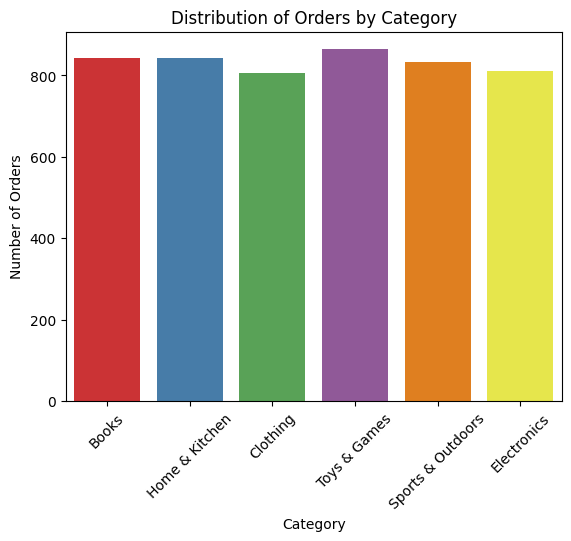

In [85]:
plt.figure()                     ##count plot
sns.countplot(
    x='Category',
    data=df,
    hue='Category',
    palette='Set1'   # colored bars
)
plt.xlabel('Category')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Category')
plt.xticks(rotation=45)
plt.show()

# **CountPlot -Distribution of orders by category**

Categories with higher bars represent higher customer demand

High-demand categories indicate:

Strong market preference

Need for better inventory planning

Low-demand categories may require:

Promotional offers

Product redesign or repositioning

Helps the business decide where to invest marketing and stock

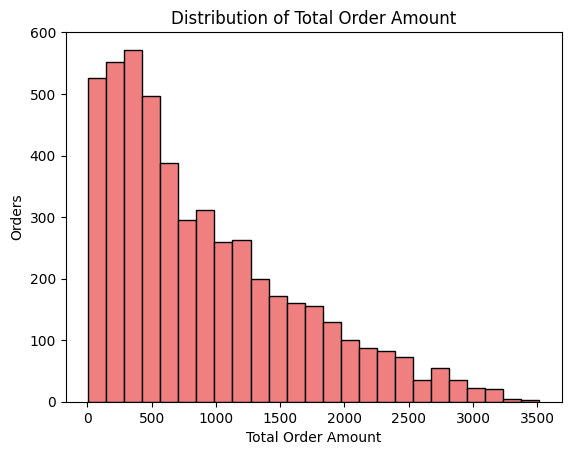

In [71]:
plt.figure()                     ##Histogram
plt.hist(
    df['TotalAmount'],
    bins=25,
    color='lightcoral',
    edgecolor='black'
)
plt.xlabel('Total Order Amount')
plt.ylabel('Orders')
plt.title('Distribution of Total Order Amount')
plt.show()

# **Histogram-Distribution of Order Amount**

Majority of orders fall in the lower-to-mid price range

Few high-value orders exist (right tail)

Revenue is influenced by a small number of premium transactions

Business can focus on upselling to convert mid-range buyers into high-value customers

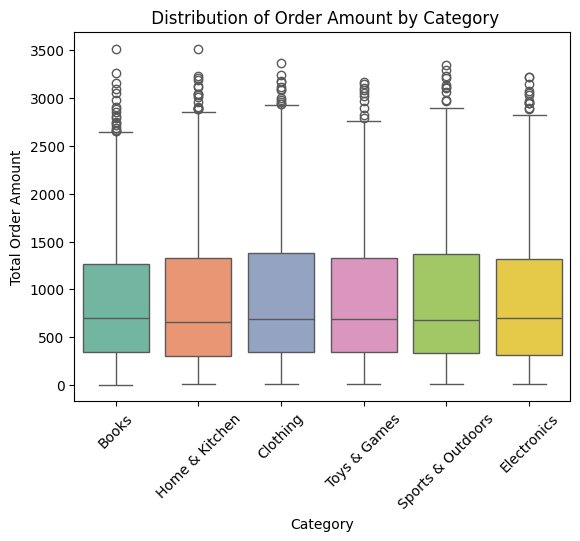

In [72]:
plt.figure()              ##Box Plot
sns.boxplot(
    x='Category',
    y='TotalAmount',
    data=df,hue='Category',
    palette='Set2'
)
plt.xlabel('Category')
plt.ylabel('Total Order Amount')
plt.title(' Distribution of Order Amount by Category')
plt.xticks(rotation=45)
plt.show()

# **Box Plot-Distribution of Order Amount by Category**
Some categories show higher medians

Greater spread indicates price variability

Helps identify high-margin categories

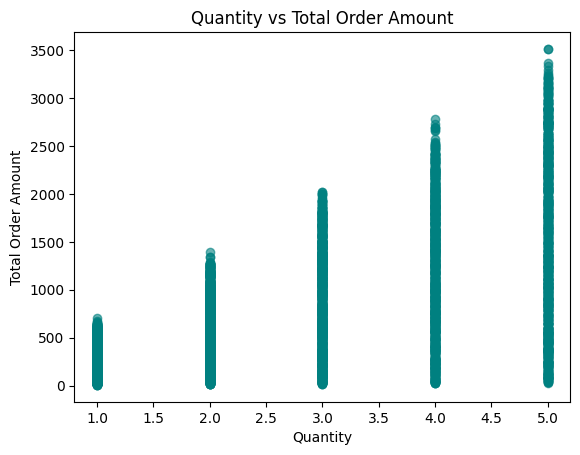

In [73]:
plt.figure()          ##Sactter plot
plt.scatter(
    df['Quantity'],
    df['TotalAmount'],
    color='teal',
    alpha=0.6
)
plt.xlabel('Quantity')
plt.ylabel('Total Order Amount')
plt.title('Quantity vs Total Order Amount')
plt.show()

# **Scatter plot-Quantity vs Total Order Amount**
QuClear* positive relationship between quantity and total amount

Higher quantities generally lead to higher revenue

Some high-value orders occur even at low quantities → premium products

Business should focus on upselling and cross-selling

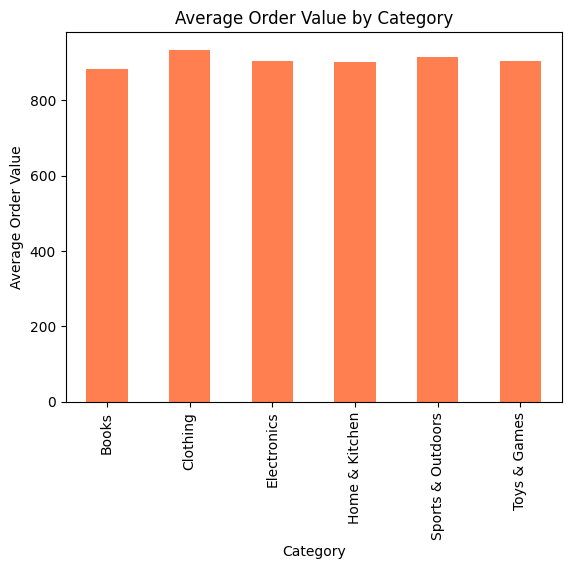

In [74]:
avg_sales = df.groupby('Category')['TotalAmount'].mean()   ## Bar Plot

plt.figure()
avg_sales.plot(
    kind='bar',
    color='coral'
)
plt.xlabel('Category')
plt.ylabel('Average Order Value')
plt.title('Average Order Value by Category')
plt.show()

# **Bar plot-Average Order Value by Category**
Some categories show significantly higher average order values

These categories contribute more to overall revenue

High-performing categories should receive priority in promotions

Low-performing categories may need pricing or bundling strategies

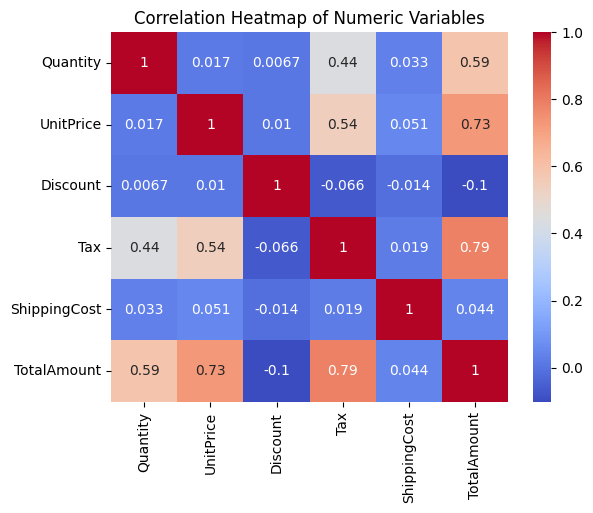

In [75]:
numeric_cols = df[['Quantity', 'UnitPrice', 'Discount', 'Tax', 'ShippingCost', 'TotalAmount']]     ## Heat Map

plt.figure()
sns.heatmap(
    numeric_cols.corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

# **Heatmap-Correlation Heatmap of Numeric Variables**
Quantity and UnitPrice show strong positive correlation with TotalAmount

Discount may have a negative or weak relationship with revenue

Helps management understand key revenue drivers

Supports data-driven pricing and discount decisions

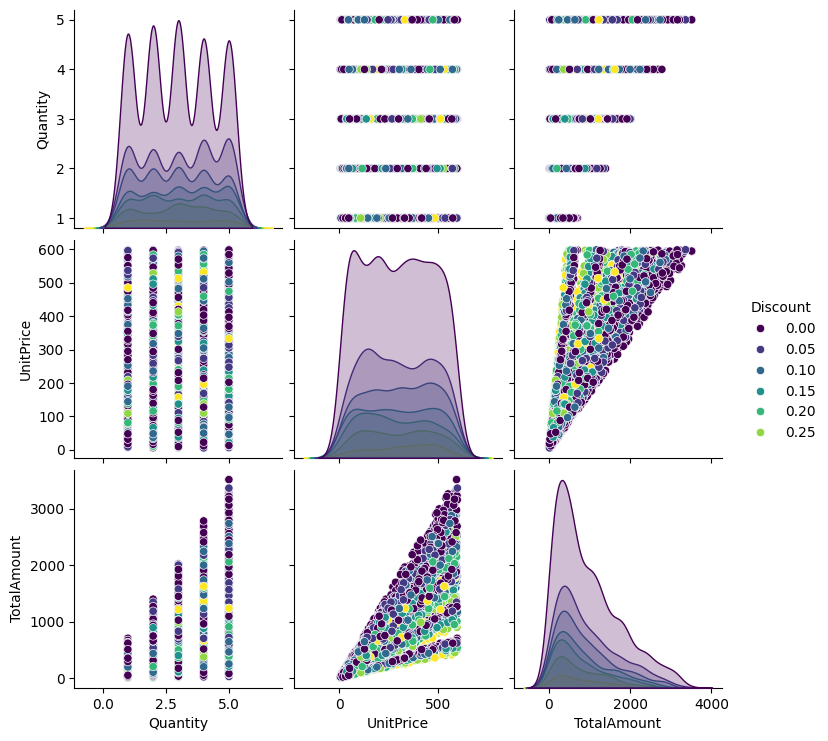

In [76]:
numeric_df = df[['Quantity', 'UnitPrice', 'Discount', 'TotalAmount']]         ##pair plot

sns.pairplot(
    numeric_df,hue='Discount',
    diag_kind='kde',palette='viridis'
)
plt.show()

# **PairPlot**
Quantity and UnitPrice jointly drive TotalAmount

Discounts affect revenue only when quantity or price is high

KDE curves show most transactions are low-to-mid value

Business insight:

Revenue growth depends on optimizing multiple levers together, not just discounts

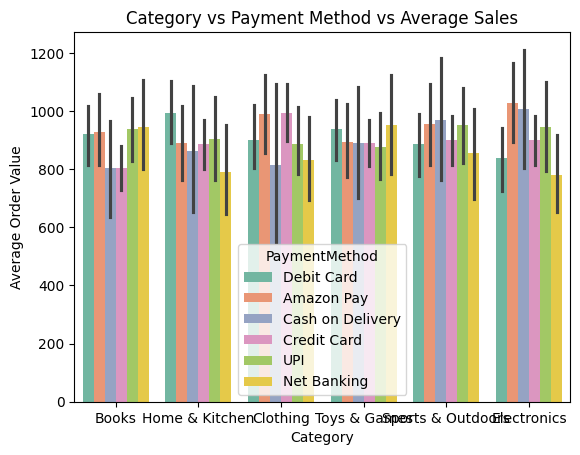

In [77]:
plt.figure()
sns.barplot(
    x='Category',
    y='TotalAmount',
    hue='PaymentMethod',
    data=df,
    palette='Set2'
)
plt.xlabel('Category')
plt.ylabel('Average Order Value')
plt.title('Category vs Payment Method vs Average Sales')
plt.show()

# **Bar(grouped Analysis) -Category vs Payment Method vs Average Sales**
Certain payment methods result in higher average spending

Customers using specific payment types tend to spend more in some categories

Business can:

Promote high-performing payment options

Offer cashback or EMI offers category-wise

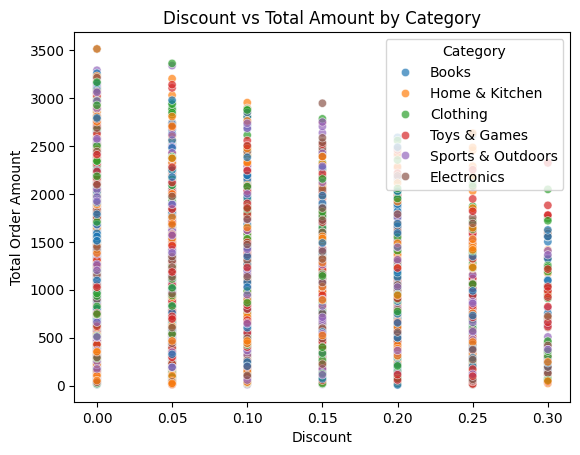

In [78]:
plt.figure()
sns.scatterplot(
    x='Discount',
    y='TotalAmount',
    hue='Category',
    data=df,
    alpha=0.7
)
plt.xlabel('Discount')
plt.ylabel('Total Order Amount')
plt.title('Discount vs Total Amount by Category')
plt.show()

# **Sactter plot-Discount vs Total Amount by Category**
Discounts do not affect all categories equally

Some categories show higher sales even with low discounts

Others rely heavily on discounts to drive revenue

Business action:

Avoid blanket discounts

Apply category-specific discount strategies

Revenue is influenced by multiple interacting variables, not a single factor
High sales occur when right product + right price + right payment method align
 Regional and category-based strategies outperform one-size-fits-all approaches
 Data supports targeted marketing, optimized pricing, and smart discounting

In [79]:
pivot_table = pd.pivot_table(
    df,
    values='TotalAmount',
    index='Category',
    columns='City',
    aggfunc='mean'
)
pivot_table

City,Austin,Charlotte,Chicago,Columbus,Dallas,Denver,Fort Worth,Houston,Indianapolis,Jacksonville,Los Angeles,New York,Philadelphia,Phoenix,San Antonio,San Diego,San Francisco,San Jose,Seattle,Washington
Category,,,,,,,,,,,,,,,,,,,,
Books,942.692105,1129.411724,933.719388,720.567917,768.302549,1136.241667,943.745429,776.245814,924.405250,889.073158,985.734762,887.824694,902.081622,1020.062368,715.878511,774.526286,895.929000,846.381957,884.392558,778.376226
Clothing,753.238889,763.850588,855.016458,902.097568,1056.621905,1038.268718,913.384359,965.515429,769.973333,862.468039,1034.060612,821.030000,961.298571,1066.095143,887.515667,1087.205238,1037.897143,730.755306,1154.584186,1041.317500
Electronics,912.401087,829.866316,916.432340,1060.337400,896.664043,918.692051,992.864651,943.181163,784.692273,837.665135,741.846500,911.468462,866.271786,818.815000,991.432093,922.386757,800.349737,1004.403250,946.144490,866.303590
Home & Kitchen,975.520000,863.758148,1021.869767,888.260976,914.421277,882.184894,1043.998611,768.237895,1020.226739,874.123158,712.471471,670.627755,969.103636,1007.969750,914.295333,690.204722,962.363810,953.235000,854.471220,1012.785882
Sports & Outdoors,902.163019,778.072326,950.324390,937.703077,1005.189167,947.778000,779.168462,1168.795000,778.745385,909.410256,912.553659,1032.020000,1113.685143,833.320000,871.190000,936.489333,823.656000,829.725435,1017.582326,745.139744
Toys & Games,851.506667,739.787674,877.935333,1049.080833,989.379400,962.477561,1062.934146,1018.664062,875.889032,798.726122,954.630577,822.050000,865.932308,919.789057,707.856667,1001.621321,846.220500,727.216000,1033.792187,1016.333684


# **PivotTable**
Shows regional preference for product categories

Some categories perform strongly in specific regions

Helps in:

Region-specific marketing campaigns

Inventory and logistics planning

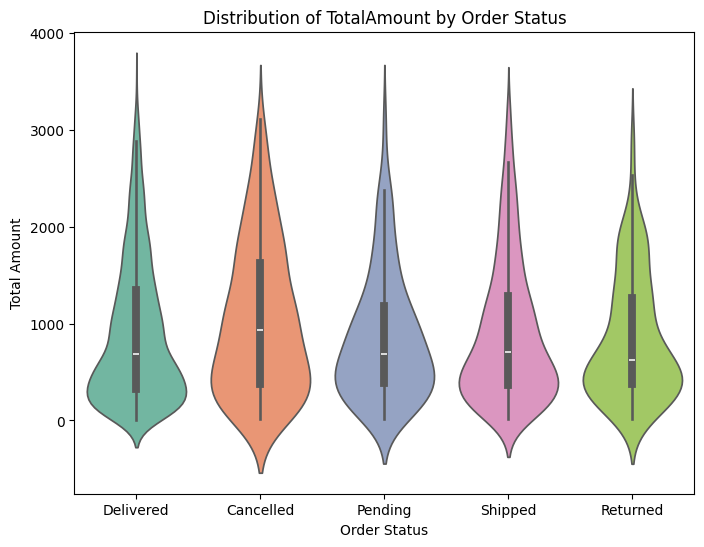

In [80]:
plt.figure(figsize=(8,6))           ##voilin plot
sns.violinplot(x='OrderStatus', y='TotalAmount', hue='OrderStatus',data=df, palette='Set2')
plt.title('Distribution of TotalAmount by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Total Amount')
plt.show()

# **violin Plot-Distribution of TotalAmount by Order Status**
Shape of the distribution:

Each violin shows the distribution of TotalAmount for that OrderStatus.

Wider sections of the violin indicate that more orders fall in that TotalAmount range.

Central tendency:

The middle line in each violin (if shown) represents the median of the TotalAmount for that order status.

Comparison across statuses:

You can see which order status tends to have higher or lower total amounts.

For example:

If Delivered has a wide range with a higher median, most high-value orders are being delivered.

If Cancelled is mostly narrow and lower, cancellations are concentrated in smaller orders.

Outliers & distribution tails:

Long tails indicate extreme orders (very high or very low TotalAmount) in that status.

This helps identify unusual patterns, like rare high-value returns.

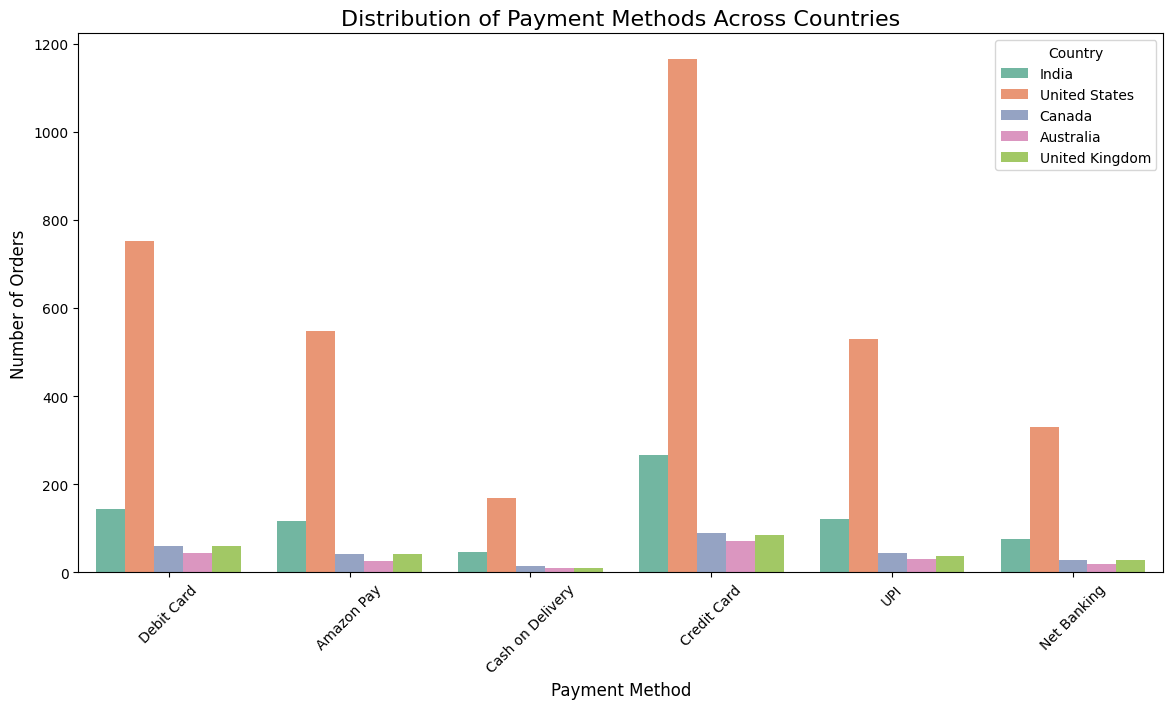

In [81]:
plt.figure(figsize=(14,7))                      ##Count Plot

sns.countplot(
    x='PaymentMethod',
    hue='Country',
    data=df,
    palette='Set2'
)

plt.title('Distribution of Payment Methods Across Countries', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Country')
plt.show()

**Count plot**

The chart displays a comparison of consumer preferences for payment methods across five different countries.

This chart showing the market share and regional trends of payment behavior. Specifically
Market Dominance: You are highlighting that your dataset is heavily skewed toward the United States.

Top Payment Drivers: You are demonstrating that "Credit Card" is the primary engine for order volume.

Global Comparison: You are showing that while the volume varies significantly by country, the rank order of preferred methods remains somewhat similar across regions (e.g., Credit Cards and Debit Cards generally lead over Net Banking or Cash on Delivery).

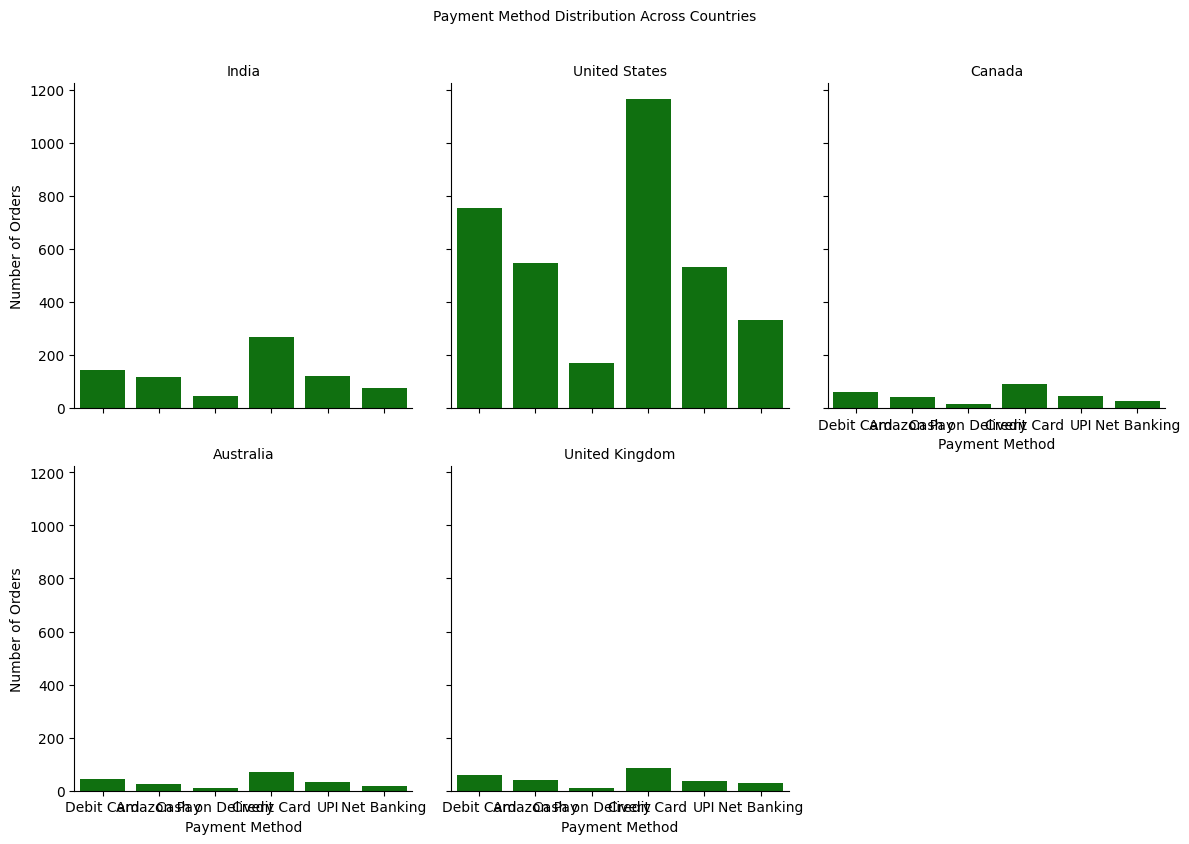

In [87]:
g = sns.catplot(                       ##group count plot
    x='PaymentMethod',
    data=df,
    kind='count',
    col='Country',
    color='green',legend = False,
    col_wrap=3,   # Adjust based on number of countries
    height=4,
    aspect=1
)

g.set_titles('{col_name}')
g.set_axis_labels('Payment Method', 'Number of Orders')
g.fig.suptitle('Payment Method Distribution Across Countries', fontsize=10, y=1.05)
plt.show()

**Group chart**

This chart uses a small multiples approach (created with sns.catplot in Python) to break down payment preferences by individual country. This is more effective than a single grouped chart because it allows you to see the "shape" of each country's data independently.

The main takeaway is the massive scale of the United States market compared to the others.

The Powerhouse: The United States generates significantly more orders than India, Canada, Australia, and the UK combined.

Universal Leader: In every single country shown, Credit Card (the tall pink bar) is the #1 preferred payment method.

The "Long Tail": Methods like Cash on Delivery (blue) and Net Banking (yellow) are the least popular across the board, regardless of the country.


## Stage 4 – Documentation, Insights and Presentation




PDF TO POWER BI DASHBOARD AND DOCUMENTATION -https://drive.google.com/file/d/1r7P7PsuNfWaDClHCUywiLgJVsN96SVdC/view?usp=drive_link


# Conclusion

From the analysis, we identified meaningful relationships and patterns in the dataset. The visualizations and insights highlight the main factors influencing the outcomes and provide a strong foundation for business decisions.